In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.special import expit

In [22]:
### Inputs 

n_players = 100
prevalence_profiles = [0.2, 0.3, 0.5]  # Must add to 1

D_j = 0.5

n_questions = 15
questions_output = {'risky_answer': 1,
                    'safe_answer' : 0}


### Players

profiles_dict = {'risky' : 0.9,
                 'random': 0.5,
                 'safe'  : 0.1}

class Player:
  def __init__(self, profile='random'):
    self.profile = profile
    self.risk_prob = profiles_dict.get(profile)

  def play_game(self, game, mode='weights'):
    answers_player = []
    for question in game.difficulty_questions:
      if mode == 'weights':
        # Prob. to answer risky = p(i) * (1-W(j)) + D(j) * W(j)
        prob_answer_risky = self.risk_prob * (1-question) + D_j * question
      elif mode == 'rasch':
        # Prob. to answer risky = e^(B-D) / 1+e^(B-D)
        prob_answer_risky = math.exp(self.risk_prob - question)/(1 + math.exp(self.risk_prob - question))
      prob_answer_safe = 1 - prob_answer_risky
      answer = np.random.choice(list(questions_output.values()), p=[prob_answer_risky, prob_answer_safe])
      answers_player.append(answer)
    # Add profile
    answers_player.append(self.profile)
    return answers_player


### Game

class Game:
  def __init__(self, n=10, difficulty='random'):
    if difficulty == 'hard':
      low_limit = 0.5
      high_limit = 1
    elif difficulty == 'random':
      low_limit = 0
      high_limit = 1
    elif difficulty == 'easy':
      low_limit = 0
      high_limit = 0.5
    self.difficulty_questions = np.random.uniform(low=low_limit, high=high_limit, size=n)
  
  def get_len_game(self):
    return len(self.difficulty_questions)

In [23]:
# Columns names

columns_names = []
dict_types = {}
for j in range(n_questions):
  name = f'Q_{j+1}'
  dict_types[name] = int
  columns_names.append(name)
columns_names.append('profile_prob')

In [24]:
# Create game
game_1 = Game(n=n_questions, difficulty='random')

# Create players
def generate_players(profiles: dict, n_players: int, prevalence: list):
  array_profiles = np.random.choice(list(profiles.keys()), size=n_players, p=prevalence)
  return [Player(prof) for prof in array_profiles]

lst_players = generate_players(profiles=profiles_dict, n_players=n_players, prevalence=prevalence_profiles)

## Mode == Weights

In [36]:
player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.1, 0.5, 0.9]
question_label = ['easy', 'medium', 'hard']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = p * (1-q) + D_j * q
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question easy ---> Prob to answer risky = 0.14
Player safe with question medium ---> Prob to answer risky = 0.30
Player safe with question hard ---> Prob to answer risky = 0.46

Player random with question easy ---> Prob to answer risky = 0.50
Player random with question medium ---> Prob to answer risky = 0.50
Player random with question hard ---> Prob to answer risky = 0.50

Player risky with question easy ---> Prob to answer risky = 0.86
Player risky with question medium ---> Prob to answer risky = 0.70
Player risky with question hard ---> Prob to answer risky = 0.54



In [25]:
# Let's Play!!

# Create Dataframe
Dataset = pd.DataFrame(columns=columns_names)

for participant in lst_players:
  answers = participant.play_game(game_1, mode='weights')
  Dataset.loc[Dataset.shape[0]] = answers

Dataset

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,profile_prob
0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,0,safe
1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,safe
2,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,safe
3,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,safe
4,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,safe
5,1,0,1,1,0,0,0,1,0,1,1,1,1,0,0,random
6,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,safe
7,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,safe
8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,safe
9,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,random


### Analyze the data

In [26]:
data_1 = Dataset[Dataset.columns[:-1]]
questions = [sum(data_1.iloc[:, i]==1) for i in range(data_1.shape[1])]

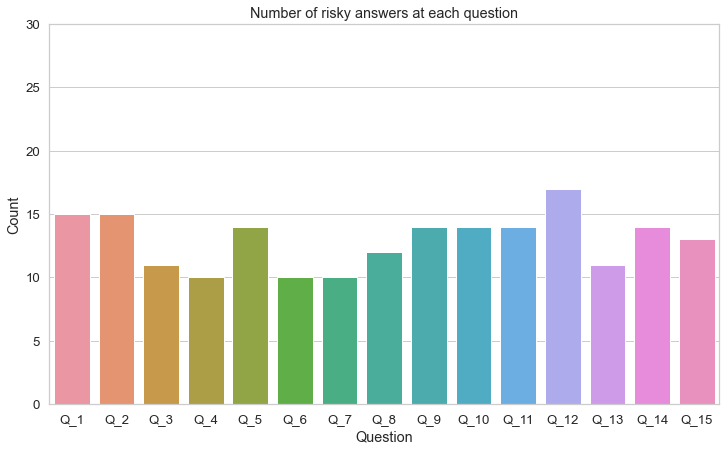

In [27]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

sns.barplot(x=columns_names[:-1], y=questions)

plt.ylim(0,len(data_1))
plt.xlabel('Question')
plt.ylabel('Count')
plt.title('Number of risky answers at each question')
plt.show()

In [28]:
data_sum = data_1.sum(axis=1)

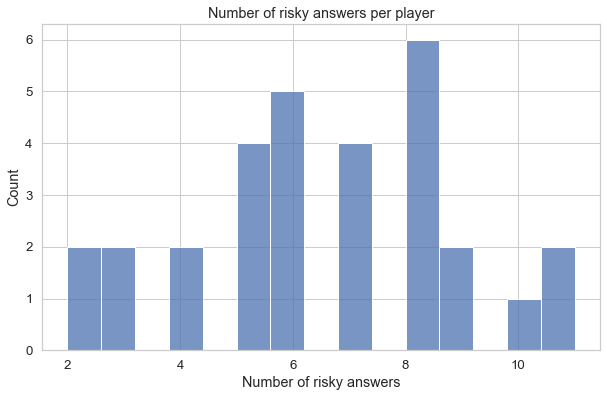

In [29]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(data_sum, bins=n_questions)

plt.xlabel('Number of risky answers')
plt.ylabel('Count')
plt.title('Number of risky answers per player')
plt.show()

### Bayesian Rasch Model

C:\Users\jperezs\Anaconda3\envs\pymc_env\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\jperezs\Anaconda3\envs\pymc_env\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\jperezs\Anaconda3\envs\pymc_env\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Sequential sampling (2 chains in 1 job)
NUTS: [Question, Person]


Sampling 2 chains for 1_000 tune and 1_500 draw iterations (2_000 + 3_000 draws total) took 1371 seconds.
The number of effective samples is smaller than 25% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\jperezs\Anaconda3\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


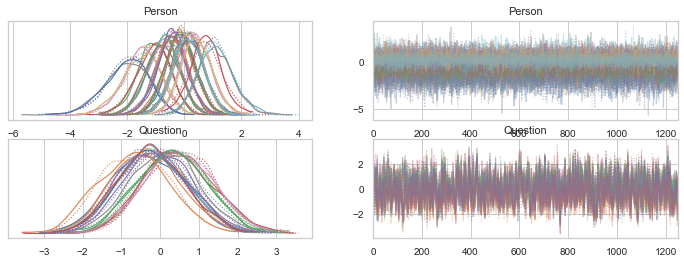

In [30]:
# Bayesian stuff
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    
    ## Independent priors
    alpha = pm.Normal('Person', mu = 0, sigma = 3, shape = (1, len(data_1)))
    gamma = pm.Normal('Question', mu = 0, sigma = 3, shape = (data_1.shape[1], 1))
    
    ## Log-Likelihood
    def logp(d):
        v1 = tt.transpose(d) * tt.log(tt.nnet.sigmoid(alpha - (gamma - gamma.mean(0))))
        v2 = tt.transpose((1-d)) * tt.log(1 - tt.nnet.sigmoid(alpha - (gamma - gamma.mean(0))))
        
        return v1 + v2

    ll = pm.DensityDist('ll', logp, observed = {'d': data_1.values})
    trace = pm.sample(1500, cores=-1, step = pm.NUTS())
    trace = trace[250:]
    
pm.plot_trace(trace)
trace_df = pm.trace_to_dataframe(trace)

In [31]:
trace_df

,Person__0_0,Person__0_1,Person__0_2,Person__0_3,Person__0_4,Person__0_5,Person__0_6,Person__0_7,Person__0_8,Person__0_9,...,Question__5_0,Question__6_0,Question__7_0,Question__8_0,Question__9_0,Question__10_0,Question__11_0,Question__12_0,Question__13_0,Question__14_0
0,0.178525,0.027639,-1.472429,-0.968777,-0.061895,0.209427,-4.678596,-2.027563,-1.013124,-1.333965,...,0.913482,1.041751,1.214190,0.235697,0.646372,0.518788,-0.114326,0.833576,1.063097,1.300400
1,0.475150,0.336719,-1.903615,-0.945610,-0.707668,0.046982,-2.460838,-1.680668,-1.675294,-1.000404,...,1.827455,2.013644,0.612278,1.173685,0.883469,0.919311,-0.134771,1.336891,0.589316,1.080037
2,0.433141,-0.050048,-0.874963,-1.267014,-0.732750,0.325025,-2.547444,-2.075195,-1.218956,-0.527590,...,0.367551,0.352652,0.887232,0.203369,0.693712,0.044051,-0.394131,1.143083,0.342042,-0.071929
3,-0.236366,0.354375,-1.644004,-0.260326,0.020048,0.658729,-2.399483,-0.840940,-1.052553,-1.342395,...,1.575470,1.199300,0.176231,0.336188,-0.256549,0.250743,-0.286592,0.222148,-0.030259,0.862771
4,0.666702,0.854903,0.246208,-1.136060,-0.952503,-0.047447,-2.913639,-2.381746,-2.234267,-0.192455,...,1.304930,1.656323,1.600689,0.701263,1.295353,0.386525,0.469341,1.271950,1.338017,0.427057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.613927,1.190124,-0.986882,-0.433280,-0.115827,-0.474159,-2.447453,-1.790856,-1.877237,-0.437366,...,0.745223,0.511742,0.548646,0.060958,0.208615,0.368217,-0.192990,0.543815,-0.610477,0.398195
2496,-1.025043,-0.304823,-0.755519,-0.768016,0.137176,0.820360,-1.496719,-3.072328,-1.250359,-1.217741,...,1.003836,0.948839,0.293173,-0.486869,-0.560666,-0.787149,-0.850179,0.205821,0.038798,-0.581565
2497,0.168763,0.529789,-1.256787,-1.306560,-0.981080,-0.258155,-1.835547,-0.759476,-1.504113,-0.862824,...,0.275273,-0.292033,-0.491795,-1.173066,-0.336080,-0.068145,-1.593928,-0.087875,-0.170332,0.113126
2498,-0.422540,-0.278655,-0.941825,-0.951979,-0.245773,0.789912,-1.088001,-2.742148,-1.294391,-1.091249,...,1.138777,0.903929,0.358561,-0.082708,0.290695,0.864672,-0.698175,0.869954,0.845169,0.894995


### Results

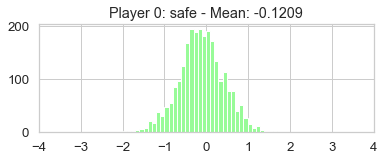

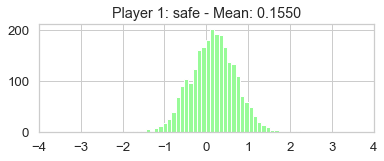

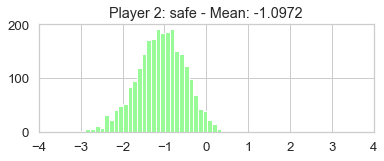

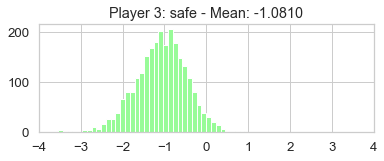

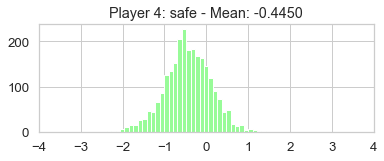

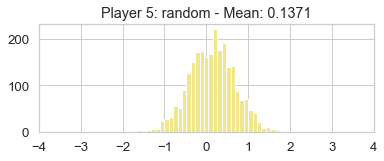

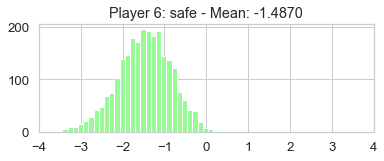

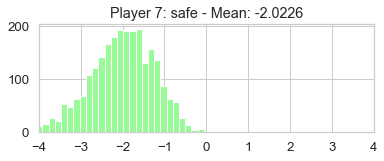

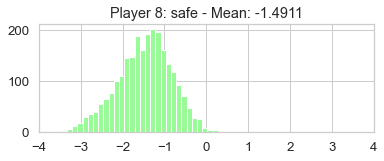

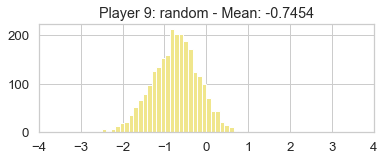

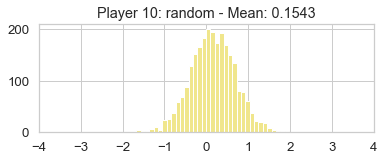

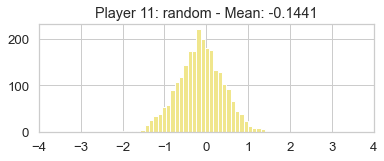

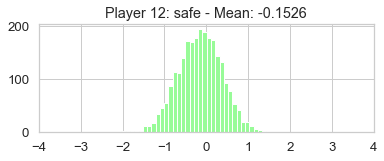

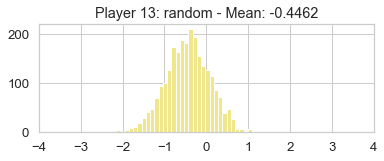

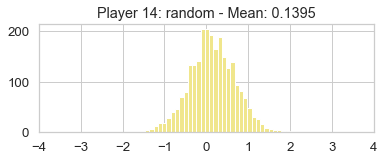

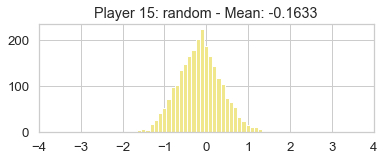

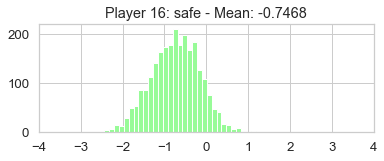

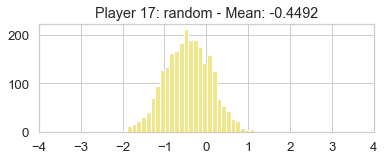

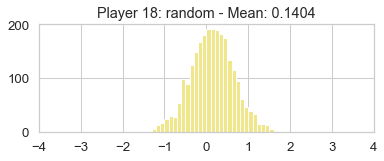

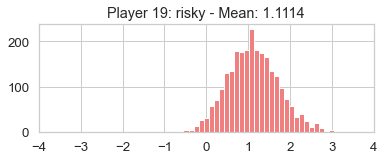

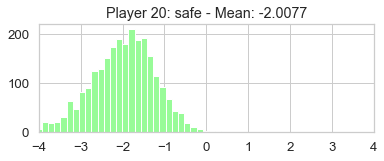

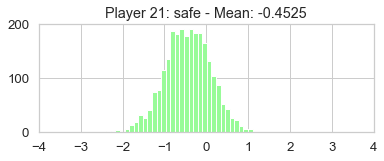

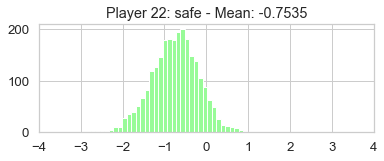

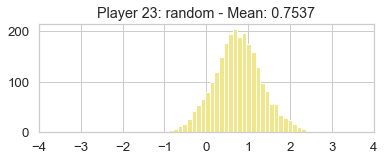

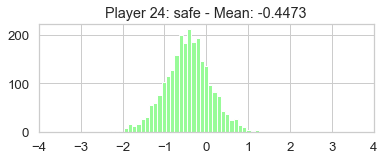

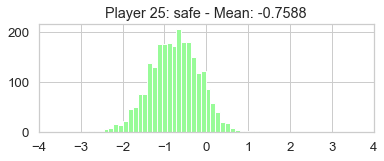

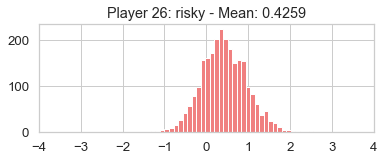

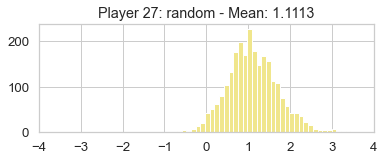

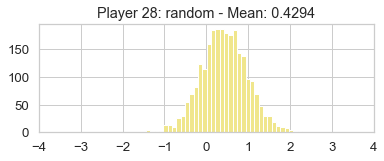

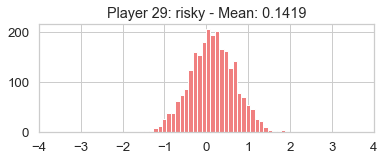

In [32]:
for i in range(n_players):
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-4, 4])
    plt.hist(trace_df[trace_df.columns[i]], bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {trace_df[trace_df.columns[i]].mean():.4f}')
    plt.show()

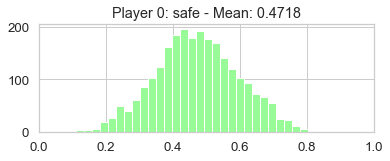

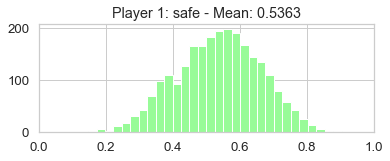

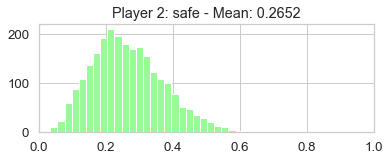

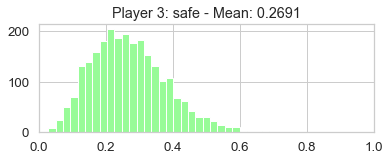

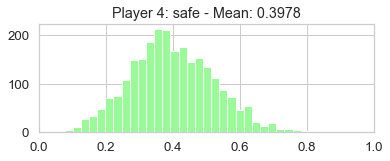

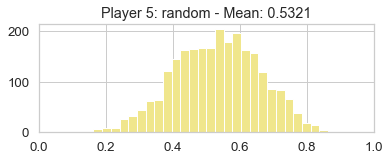

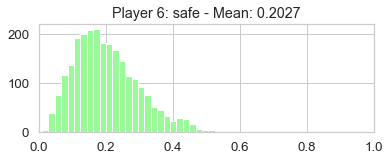

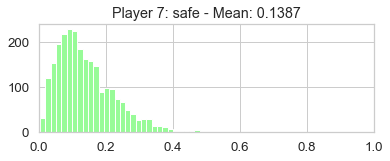

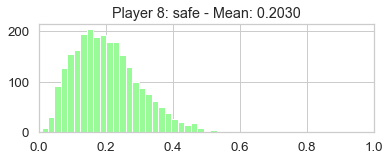

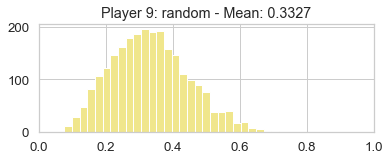

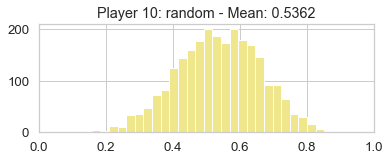

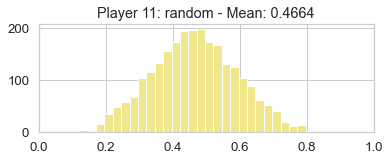

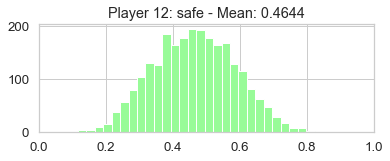

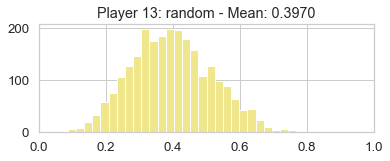

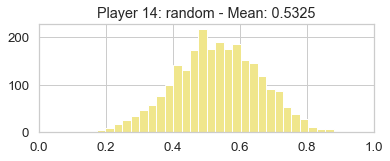

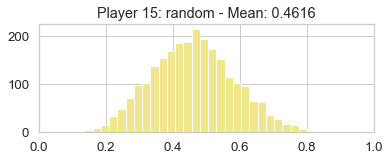

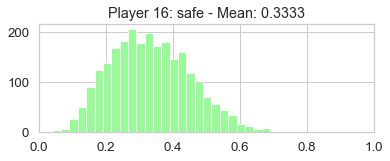

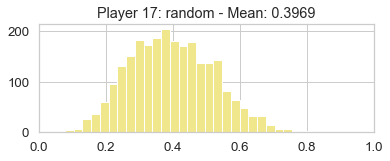

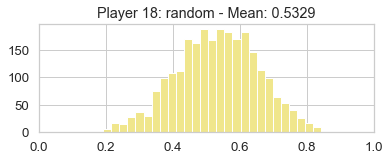

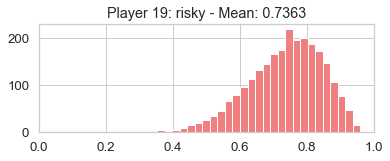

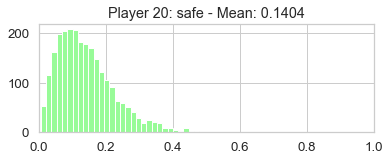

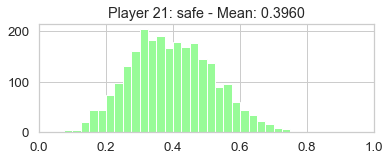

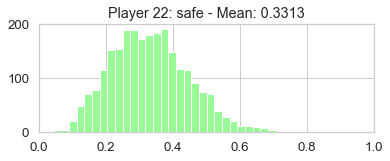

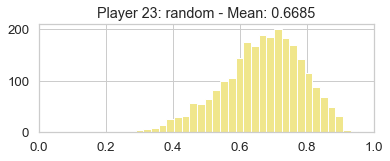

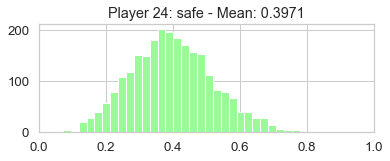

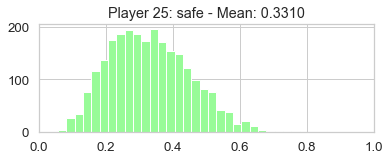

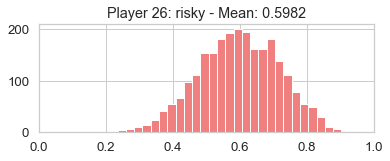

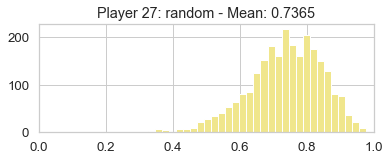

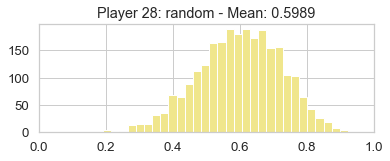

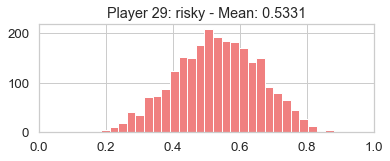

In [46]:
# Expit
for i in range(n_players):
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    plt.hist(expit(trace_df[trace_df.columns[i]]), bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {expit(trace_df[trace_df.columns[i]]).mean():.4f}')
    plt.show()

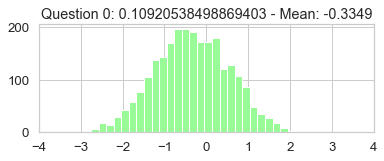

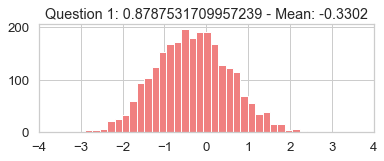

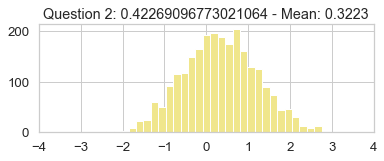

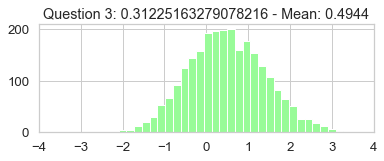

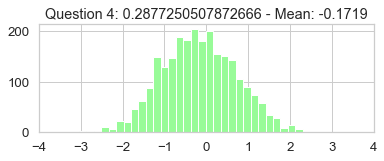

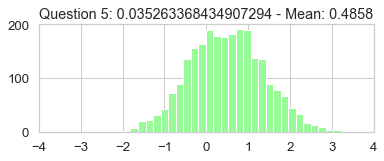

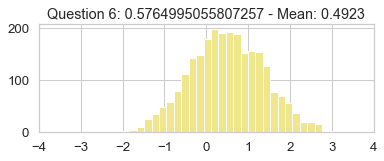

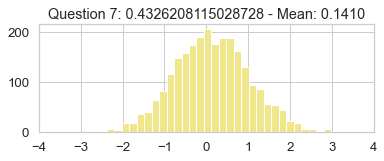

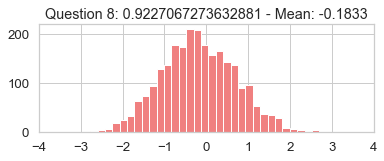

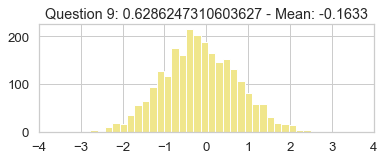

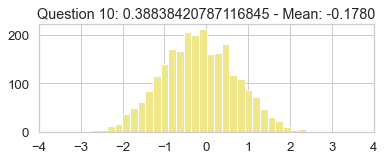

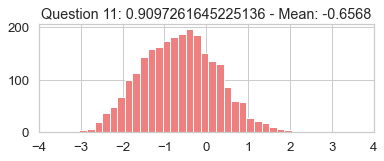

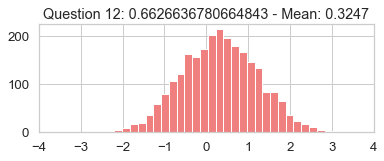

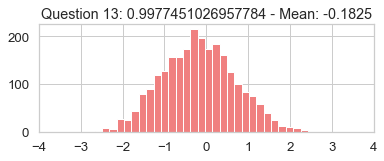

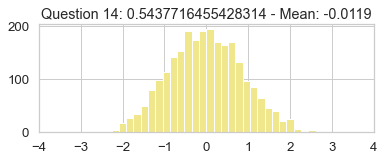

In [47]:
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0.66 <= difficulty < 1:
        diff_label = 'Hard'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium'
        color_hist = 'khaki'
    elif 0 <= difficulty < 0.33:
        diff_label = 'Easy'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-4, 4])
    plt.hist(trace_df[trace_df.columns[i+n_players]], bins='auto', color=color_hist)
    plt.title(f'Question {i}: {difficulty:3.} - Mean: {trace_df[trace_df.columns[i+n_players]].mean():.4f}')
    plt.show()

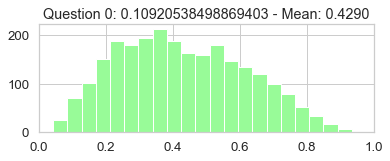

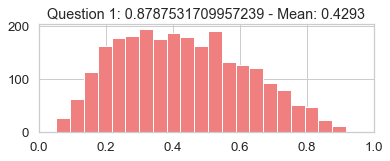

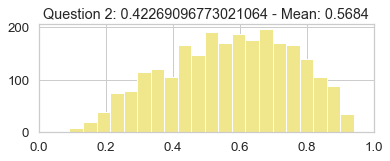

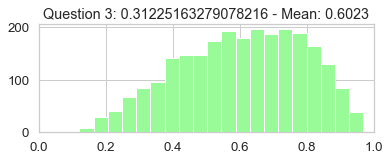

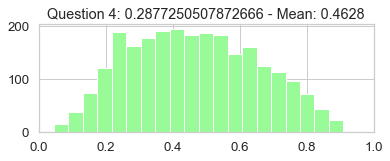

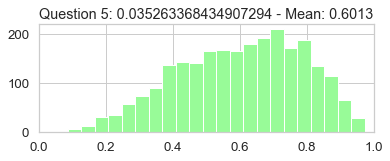

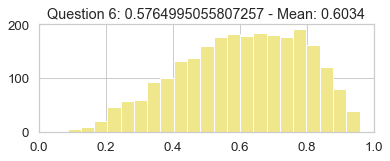

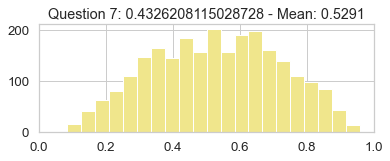

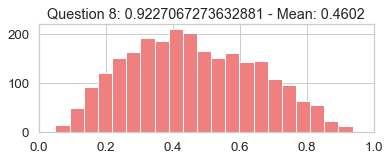

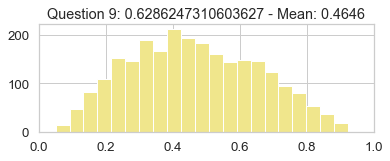

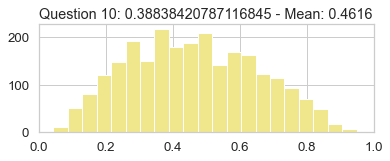

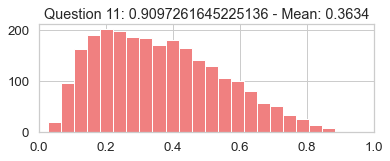

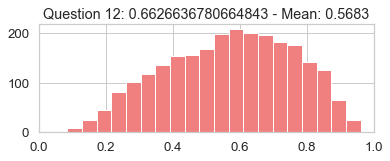

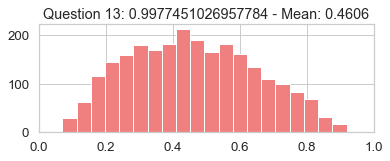

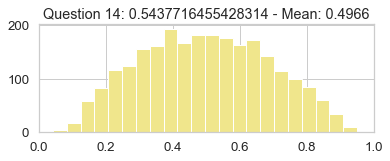

In [48]:
# Expit
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0.66 <= difficulty < 1:
        diff_label = 'Hard'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium'
        color_hist = 'khaki'
    elif 0 <= difficulty < 0.33:
        diff_label = 'Easy'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    plt.hist(expit(trace_df[trace_df.columns[i+n_players]]), bins='auto', color=color_hist)
    plt.title(f'Question {i}: {difficulty} - Mean: {expit(trace_df[trace_df.columns[i+n_players]]).mean():.4f}')
    plt.show()

## Mode == Rasch

In [49]:
player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.1, 0.5, 0.9]
question_label = ['easy', 'medium', 'hard']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = math.exp(p - q)/(1 + math.exp(p - q))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question easy ---> Prob to answer risky = 0.50
Player safe with question medium ---> Prob to answer risky = 0.40
Player safe with question hard ---> Prob to answer risky = 0.31

Player random with question easy ---> Prob to answer risky = 0.60
Player random with question medium ---> Prob to answer risky = 0.50
Player random with question hard ---> Prob to answer risky = 0.40

Player risky with question easy ---> Prob to answer risky = 0.69
Player risky with question medium ---> Prob to answer risky = 0.60
Player risky with question hard ---> Prob to answer risky = 0.50



In [50]:
# Let's Play!!

# Create Dataframe
Dataset_rasch = pd.DataFrame(columns=columns_names)

for participant in lst_players:
  answers = participant.play_game(game_1, mode='weights')
  Dataset_rasch.loc[Dataset_rasch.shape[0]] = answers

Dataset_rasch

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,profile_prob
0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,safe
1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,safe
2,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,safe
3,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,safe
4,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,safe
5,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,random
6,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,safe
7,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,safe
8,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,safe
9,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,random


### Analyze the data

In [51]:
data_1 = Dataset_rasch[Dataset_rasch.columns[:-1]]
questions = [sum(data_1.iloc[:, i]==1) for i in range(data_1.shape[1])]

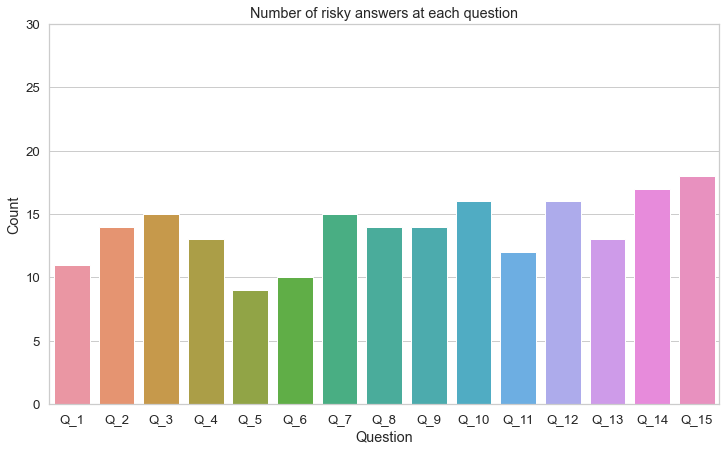

In [52]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

sns.barplot(x=columns_names[:-1], y=questions)

plt.ylim(0,len(data_1))
plt.xlabel('Question')
plt.ylabel('Count')
plt.title('Number of risky answers at each question')
plt.show()

In [53]:
data_sum = data_1.sum(axis=1)

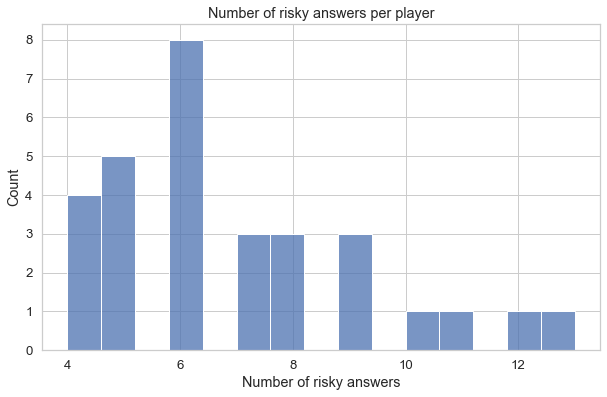

In [54]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(data_sum, bins=n_questions)

plt.xlabel('Number of risky answers')
plt.ylabel('Count')
plt.title('Number of risky answers per player')
plt.show()

### Bayesian Rasch Model

C:\Users\jperezs\Anaconda3\envs\pymc_env\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\jperezs\Anaconda3\envs\pymc_env\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\jperezs\Anaconda3\envs\pymc_env\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Sequential sampling (2 chains in 1 job)
NUTS: [Question, Person]


Sampling 2 chains for 1_000 tune and 1_500 draw iterations (2_000 + 3_000 draws total) took 1264 seconds.
The number of effective samples is smaller than 25% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\jperezs\Anaconda3\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


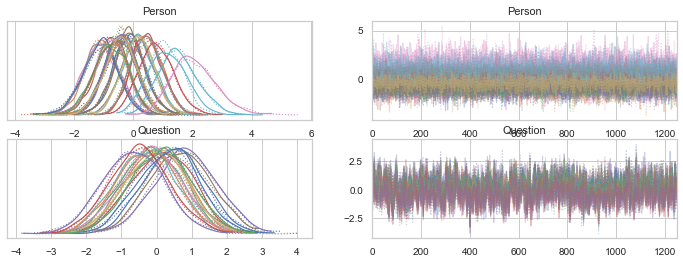

In [55]:
# Bayesian stuff
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    
    ## Independent priors
    alpha = pm.Normal('Person', mu = 0, sigma = 3, shape = (1, len(data_1)))
    gamma = pm.Normal('Question', mu = 0, sigma = 3, shape = (data_1.shape[1], 1))
    
    ## Log-Likelihood
    def logp(d):
        v1 = tt.transpose(d) * tt.log(tt.nnet.sigmoid(alpha - (gamma - gamma.mean(0))))
        v2 = tt.transpose((1-d)) * tt.log(1 - tt.nnet.sigmoid(alpha - (gamma - gamma.mean(0))))
        
        return v1 + v2

    ll = pm.DensityDist('ll', logp, observed = {'d': data_1.values})
    trace = pm.sample(1500, cores=-1, step = pm.NUTS())
    trace = trace[250:]
    
pm.plot_trace(trace)
trace_df = pm.trace_to_dataframe(trace)

In [65]:
trace_df

,Person__0_0,Person__0_1,Person__0_2,Person__0_3,Person__0_4,Person__0_5,Person__0_6,Person__0_7,Person__0_8,Person__0_9,...,Question__5_0,Question__6_0,Question__7_0,Question__8_0,Question__9_0,Question__10_0,Question__11_0,Question__12_0,Question__13_0,Question__14_0
0,-0.443092,-1.677727,-0.820432,-0.299035,-0.013565,-0.089959,-0.154470,-1.328291,0.493049,-0.134746,...,0.474715,-0.848499,0.289584,0.220048,-0.124925,0.315010,-0.607306,0.281675,-1.028380,-0.545225
1,-1.050826,0.096019,-0.699766,-0.532391,0.240412,0.273622,-0.720089,-0.141394,-2.241463,0.010707,...,2.082597,1.180413,1.805799,1.667123,1.115599,1.689544,0.404715,1.904278,0.609548,0.896228
2,-0.343870,-1.226763,-0.552823,-0.371777,-0.735175,-0.258659,-1.075352,-0.871889,-1.595402,0.766840,...,1.983901,1.552045,1.258834,1.103651,1.035680,1.781430,1.855470,1.321030,1.407439,0.574910
3,-0.607966,-0.910358,-0.259712,-1.898158,-0.231985,-0.030312,-1.032488,-1.159049,-0.380829,-0.716006,...,2.341093,1.726685,1.278437,1.165644,0.811915,2.083515,2.108707,1.606221,1.420514,1.040002
4,-0.161567,-1.706045,-1.389163,-1.159725,0.096371,-0.301831,-1.761116,-1.021798,-0.079594,0.145923,...,2.216561,0.955244,1.811530,1.456046,1.579485,2.270406,0.744992,1.342659,1.120346,0.052411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-1.154841,-1.482349,1.141756,-2.073662,-0.431133,-0.842092,-0.490372,-1.475136,0.334514,-0.929602,...,-0.099429,-0.301035,-0.685266,-1.445778,-0.920439,-0.229451,-0.867631,-0.799299,-1.757574,-1.546944
2496,-0.859815,-0.778521,-0.480996,-1.210155,-0.437139,0.080132,-1.536864,-1.570362,-1.015917,-0.437942,...,0.517451,-1.028575,-0.096228,0.455214,-0.708262,0.081865,-0.793560,0.040626,-0.178852,-0.801437
2497,-0.269284,-0.583010,-0.652535,-0.341684,-0.566307,-1.382912,-1.123794,-0.156065,-1.664378,-0.187406,...,0.666076,0.107901,-0.161650,-0.076108,-0.257517,0.572312,0.183086,-0.095389,-0.593744,-0.265112
2498,-0.142368,-0.796154,-0.882456,-0.962393,-0.082342,-1.388941,-0.896283,-0.565391,-1.997554,-0.093523,...,1.140927,0.192567,-0.007093,0.177421,-0.475710,-0.073081,-0.116170,0.244772,-0.097935,-0.193057


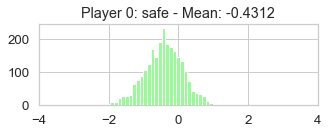

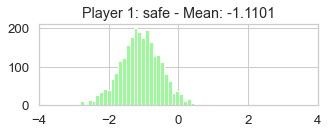

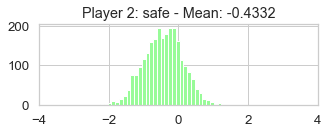

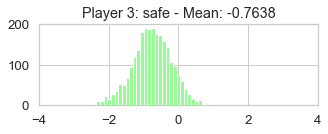

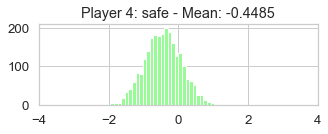

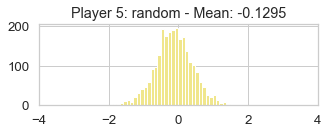

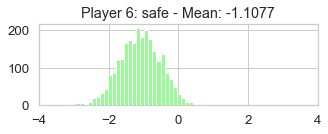

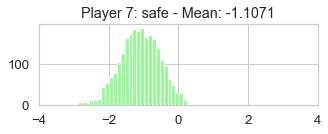

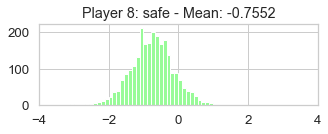

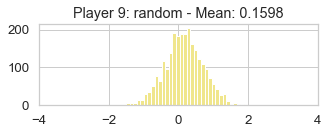

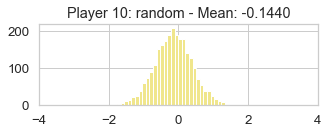

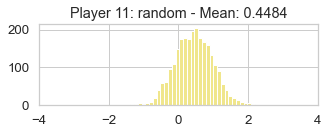

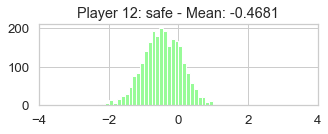

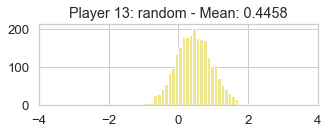

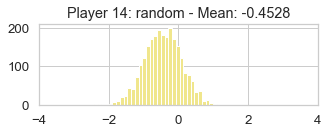

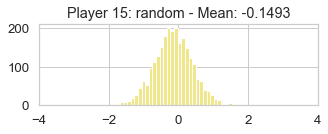

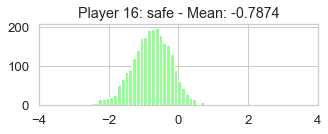

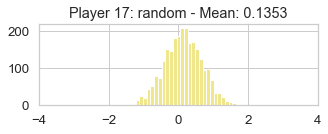

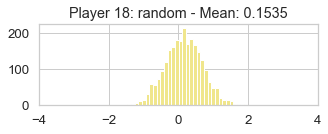

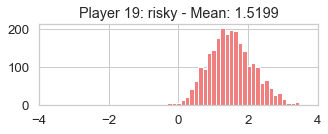

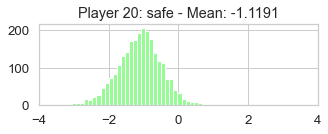

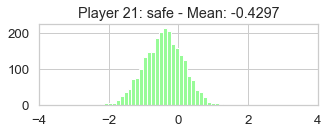

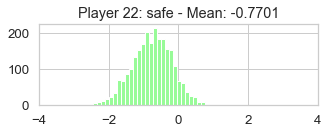

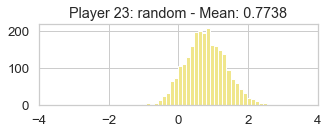

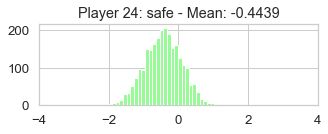

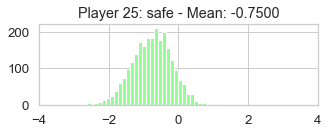

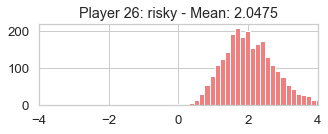

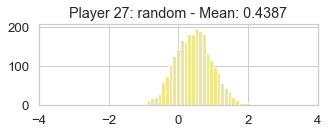

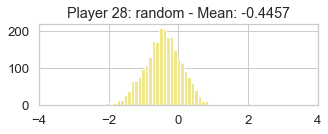

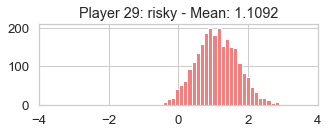

In [66]:
for i in range(n_players):
    # profile
    profile = Dataset_rasch.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-4, 4])
    plt.hist(trace_df[trace_df.columns[i]], bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {trace_df[trace_df.columns[i]].mean():.4f}')
    plt.show()

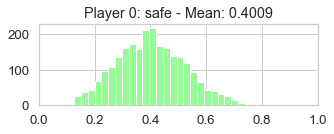

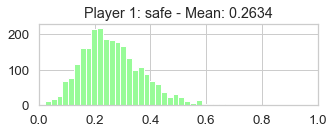

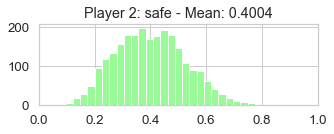

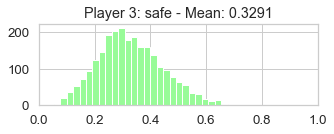

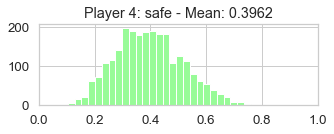

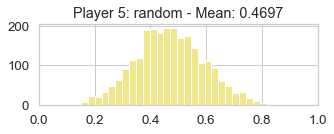

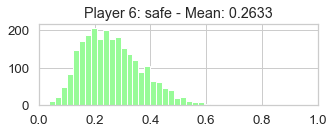

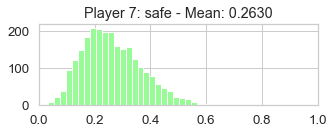

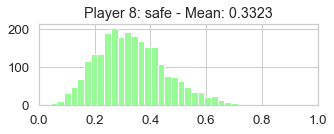

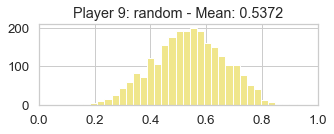

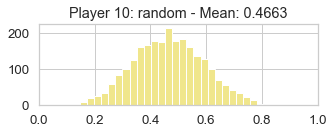

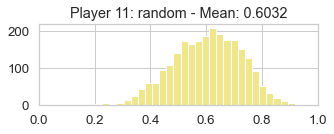

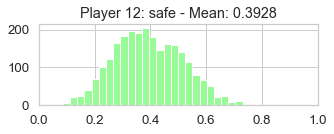

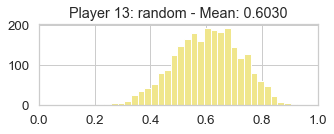

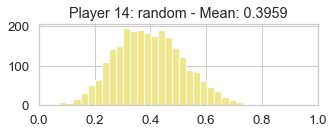

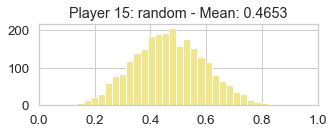

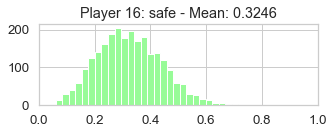

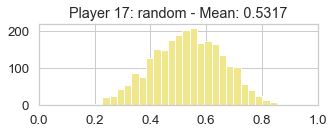

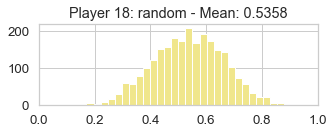

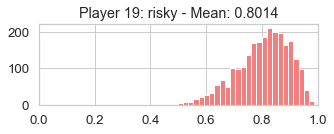

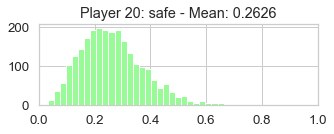

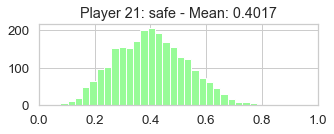

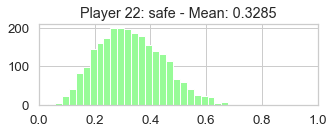

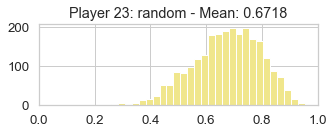

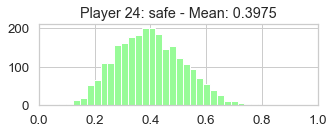

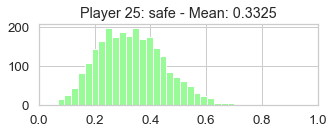

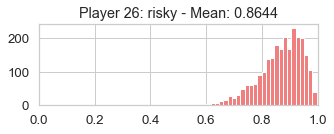

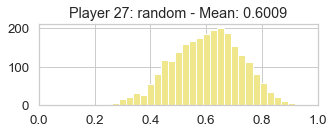

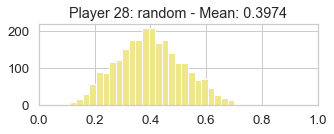

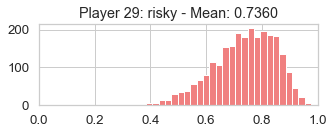

In [67]:
# Expit
for i in range(n_players):
    # profile
    profile = Dataset_rasch.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    plt.hist(expit(trace_df[trace_df.columns[i]]), bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {expit(trace_df[trace_df.columns[i]]).mean():.4f}')
    plt.show()

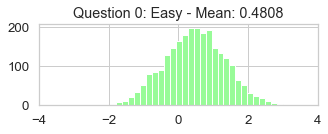

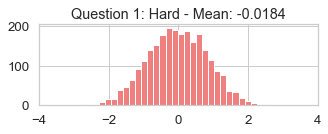

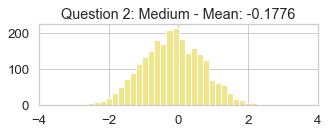

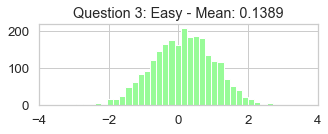

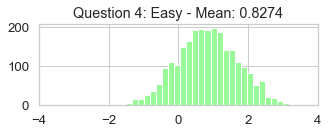

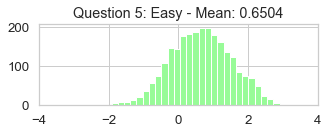

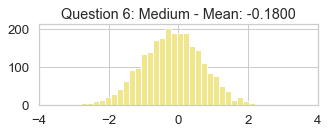

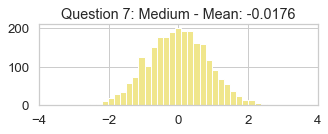

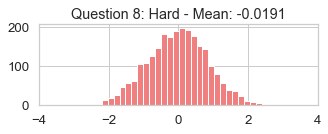

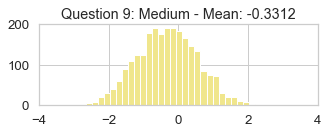

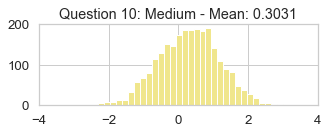

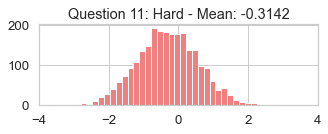

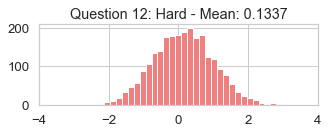

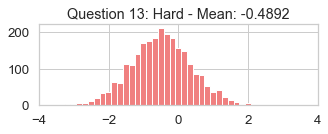

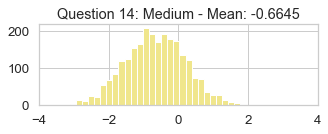

In [68]:
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0.66 <= difficulty < 1:
        diff_label = 'Hard'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium'
        color_hist = 'khaki'
    elif 0 <= difficulty < 0.33:
        diff_label = 'Easy'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-4, 4])
    plt.hist(trace_df[trace_df.columns[i+n_players]], bins='auto', color=color_hist)
    plt.title(f'Question {i}: {diff_label} - Mean: {trace_df[trace_df.columns[i+n_players]].mean():.4f}')
    plt.show()

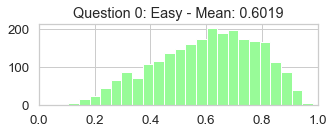

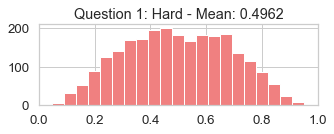

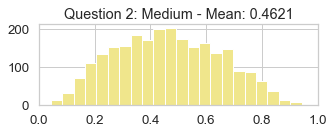

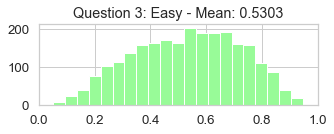

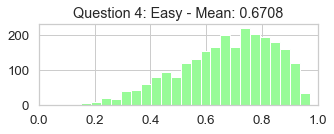

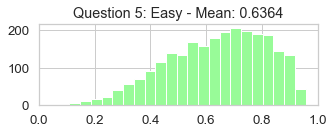

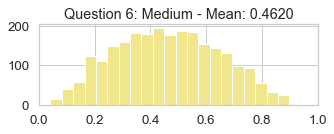

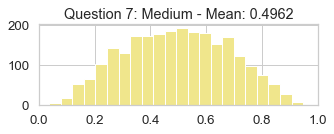

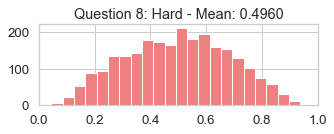

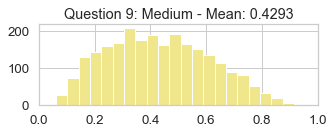

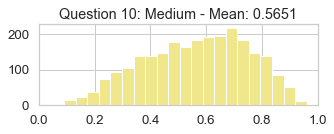

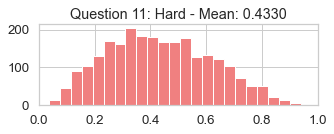

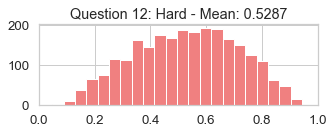

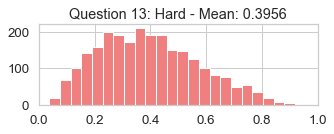

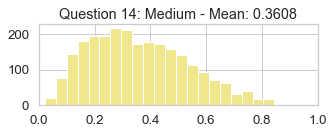

In [69]:
# Expit
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0.66 <= difficulty < 1:
        diff_label = 'Hard'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium'
        color_hist = 'khaki'
    elif 0 <= difficulty < 0.33:
        diff_label = 'Easy'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    plt.hist(expit(trace_df[trace_df.columns[i+n_players]]), bins='auto', color=color_hist)
    plt.title(f'Question {i}: {diff_label} - Mean: {expit(trace_df[trace_df.columns[i+n_players]]).mean():.4f}')
    plt.show()